[View in Colaboratory](https://colab.research.google.com/github/khandelwal1998/NLP_MessagesSpamHamDetection/blob/master/spam_ham.ipynb)

In [0]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [9]:
!ls

datalab


In [10]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SMSSpamCollection to SMSSpamCollection
User uploaded file "SMSSpamCollection" with length 477907 bytes


In [0]:
messages=[line.strip() for line in open("SMSSpamCollection")]

In [12]:
len(messages)

5574

In [13]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
for n,message in enumerate(messages[:10]):
    print(n,message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

<font color='blue'>In normal file the data is seperated with a tab space so we can use pandasto import the file and use the delimiter to remove the tabs while importing.</font>

In [0]:
data=pd.read_csv("SMSSpamCollection",delimiter='\t',names=['type','message'])

In [16]:
data.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data.describe()

,type,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
data[data['type']=='spam'].count()

type       747
message    747
dtype: int64

<font color='blue'>The describe matrix shows that there are only two type of message categories,  thats spam and ham. At the same place out of 5572 rows only 5169 messgaes are unique so repetitions are there.</font>

<font color='blue' size='5px'>Now lets group by in terms of label to gain more details</font>

In [0]:
gd=data.groupby(by='type')

In [20]:
gd.describe()

message                                                               
       count unique                                                top freq
type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

<font color='blue' size='15px'></font>

<font color='blue' size='10px'>Exploratory Data analysis</font>

We need more features so lets find length of all the messgaes

In [0]:
data['length']=data['message'].apply(len)

In [22]:
data.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [23]:
data.head()

,type,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now lets plot the hist plot for the length of messgaes.

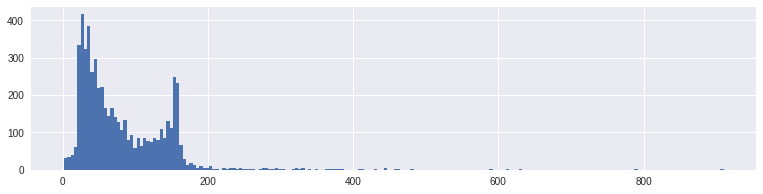

In [24]:
plt.figure(figsize=(13,3))
data['length'].hist(bins=200)

From the above plot it is clear that there is many variation in the data.
It has binomial plotting.
There are strings with length more that 200 but they are less in frequency. so lets find how many spam and ham messgae fall in this category.

In [25]:
data[data['length']>200].groupby(by='type').describe()

length                                                           
      count        mean         std    min    25%    50%    75%    max
type                                                                  
ham   112.0  308.392857  117.791185  201.0  233.5  278.5  329.0  910.0
spam    1.0  223.000000         NaN  223.0  223.0  223.0  223.0  223.0

There is a big observation we can see through this. Mostly every spam message length is not greater than 200. So we can use length as a strong feature. Lets move forward to check whether we can use length or is there any other feature.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f970e864668>,
      dtype=object)

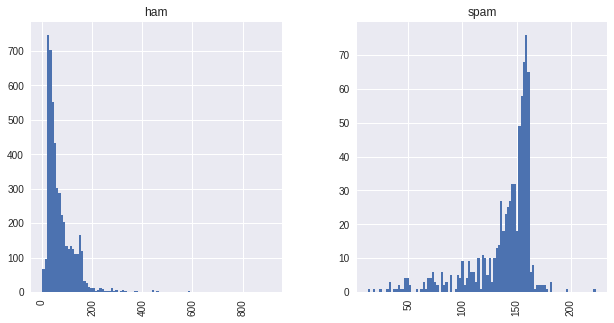

In [26]:
data.hist(by='type',bins=100,figsize=(10,5))

By this we can see spam message mostly have less length and they are distributed in all range between 0-170 or 180 
So length could be a good feature to distinguish between spam and ham.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f970c4e6e80>,
      dtype=object)

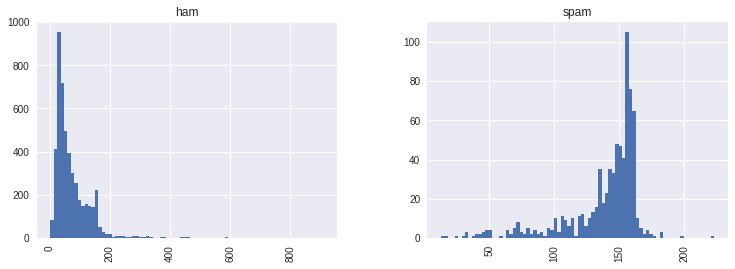

In [27]:
data['length'].hist(by=data['type'],bins=80,figsize=(12,4))

From this we came to know that spam messages have mode character

Now after nowing the strong features, lets start the preprocessing of data. 
Remove the punctuations and the stop words.

In [0]:
import string
from nltk.corpus import stopwords


In [34]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

These words can be removed as they dont tell us any distinguishing feature

In [0]:
 mssg="This is the string!  with punctutaion and,  stop words."

In [0]:
no_punc=[c for c in mssg if c not in string.punctuation]

In [0]:
x=''.join(no_punc)

In [0]:
x=x.split()

In [0]:
words=[m for m in x if m.lower() not in stopwords.words('english')]

In [40]:
words

['string', 'punctutaion', 'stop', 'words']

In [0]:
 def clean_data(words):
        words=[c for c in words if c not in string.punctuation]
        words=''.join(words)
        words=[c for c in words.split() if c.lower() not in stopwords.words('english')]
        return(words)

In [42]:
data['message'].head().apply(clean_data)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

Counting occurence of each word in every message.


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
bag_of_wrds=CountVectorizer(analyzer=clean_data).fit(data['message'])

In [0]:
bag_of_wrds.v

In [0]:
\#bag_of_wrds.vocabulary_

In [47]:
print(len(bag_of_wrds.vocabulary_))

11425


In [54]:
data['message'][3]

'U dun say so early hor... U c already then say...'

In [0]:
messages_bow=bag_of_wrds.transform(data['message'])

In [73]:
print(messages_bow[0])

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1


In [56]:
print("Shape  of sparse matrix",messages_bow.shape)

Shape  of sparse matrix (5572, 11425)


To get the amount of zero occurences

In [59]:
messages_bow.nnz   #nnz=no non zero

50548

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

In [0]:
from sklearn.feature_extraction.text  import TfidfTransformer

In [0]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [66]:
print(tfidf_transformer.transform(messages_bow[3]))

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [69]:
 tfidf_transformer.idf_[bag_of_wrds.vocabulary_['university']]

8.527076498901426

In [0]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [81]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

Now we have tfidf for each message so lets train our classifier to detect whether a message is spam or ham.

We will use naive_bayes classifier.




In [0]:
from sklearn.naive_bayes import MultinomialNB

LEts split our data in training and testing part

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['type'],test_size=0.3)

In [0]:
 spam_detect_model=MultinomialNB().fit(messages_tfidf,data['type'])

In [90]:
spam_detect_model.predict(messages_tfidf[3])

array(['ham'], dtype='<U4')

In [0]:
all_pred=spam_detect_model.predict(messages_tfidf)

pipeline

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_data)),('tfidf',TfidfTransformer()),
                  ('classifier',MultinomialNB())])

In [101]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function clean_data at 0x7f970bcefd08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [0]:
predict=pipeline.predict(x_test)

In [0]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1454
       spam       1.00      0.78      0.88       218

avg / total       0.97      0.97      0.97      1672

